# Question 2: Datascience with Pandas and Movie Data

0. Access some historical IMDB data files from the shared drive: 

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [35]:
data_dir = "./" #https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

basics = pd.read_csv(data_dir+"/title.basics.tsv.gz", sep='\t')
basics.head()


/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
# Check dataframe summary
basics.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330276 entries, 0 to 5330275
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          5330276 non-null  object
 1   titleType       5330276 non-null  object
 2   primaryTitle    5330270 non-null  object
 3   originalTitle   5330270 non-null  object
 4   isAdult         5330276 non-null  int64 
 5   startYear       5330276 non-null  object
 6   endYear         5330276 non-null  object
 7   runtimeMinutes  5330276 non-null  object
 8   genres          5330274 non-null  object
dtypes: int64(1), object(8)
memory usage: 366.0+ MB


In [ ]:
# trying to find a data type for each column
for col in basics.columns:
    print(basics[col].unique())

In [4]:
akas = pd.read_csv(data_dir+"/title.akas.tsv.gz", sep='\t')

akas.head()

/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [5]:
# Check dataframe summary
akas.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423660 entries, 0 to 3423659
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          3423660 non-null  object
 1   ordering         3423660 non-null  int64 
 2   title            3423660 non-null  object
 3   region           3423605 non-null  object
 4   language         3423660 non-null  object
 5   types            3423660 non-null  object
 6   attributes       3423660 non-null  object
 7   isOriginalTitle  3423660 non-null  object
dtypes: int64(1), object(7)
memory usage: 209.0+ MB


In [ ]:
# trying to find a data type for each column
for col in akas.columns:
    print(akas[col].unique())

In [6]:
ratings = pd.read_csv(data_dir+"/title.ratings.tsv.gz", sep='\t')

ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [7]:
# Check dataframe summary
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874203 entries, 0 to 874202
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         874203 non-null  object 
 1   averageRating  874203 non-null  float64
 2   numVotes       874203 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ MB


In [ ]:
# trying to find a data type for each column
for col in ratings.columns:
    print(ratings[col].unique())

In [8]:
print(akas.shape)
print(ratings.shape)
print(basics.shape)

(3423660, 8)
(874203, 3)
(5330276, 9)


### Drop duplicates in all the dataframes

In [9]:
basics.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)
akas.drop_duplicates(subset ="titleId",
                     keep = False, inplace = True)
ratings.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)

In [ ]:
basics.shape

In [ ]:
akas.shape

In [ ]:
ratings.shape

### 3. Merging the dataframes

In [10]:
# rename tconst to titleId
basics = basics.rename(columns={'tconst':'titleId'})
ratings = ratings.rename(columns={'tconst':'titleId'})

In [11]:
from functools import reduce

dfs = [basics, akas, ratings]

df_inner = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='inner'), dfs)
df_outer = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='outer'), dfs)

In [12]:
print("inner produces shape: ",df_inner.shape)
print("outer produces shape: ",df_outer.shape)

inner produces shape:  (376260, 18)
outer produces shape:  (5333998, 18)


In [13]:
print(f"inner produces {len(df_inner.titleType.unique())} unique titleTypes")
print(f"outer produces {len(df_outer.titleType.unique())} unique titleTypes")

inner produces 10 unique titleTypes
outer produces 11 unique titleTypes


In [ ]:
df_inner.head()

In [ ]:
df_outer.head()

4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 


In [ ]:
df_outer.titleType.unique()

In [ ]:
df_outer.region.unique()

In [ ]:
df_outer.language.unique()

In [14]:
df_new = df_inner[((df_inner["language"]=="en") | (df_inner['region']=="US")) & (df_inner["titleType"].isin(['movie', 'tvMovie']))]
df_outer_new = df_outer[((df_outer["language"]=="en") | (df_outer['region']=="US")) & (df_outer["titleType"].isin(['movie', 'tvMovie']))]

In [15]:
df_new.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
119,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,5.9,26
231,tt0001159,movie,The Connecticut Yankee,The Connecticut Yankee,0,1910,\N,\N,\N,1,The Connecticut Yankee,US,\N,\N,\N,0,5.7,6
241,tt0001230,movie,Gentleman Joe,Gentleman Joe,0,1910,\N,\N,\N,1,Gentleman Joe,US,\N,\N,\N,0,5.0,6
271,tt0001482,movie,As in a Looking Glass,As in a Looking Glass,0,1911,\N,\N,Drama,1,As in a Looking Glass,US,\N,\N,\N,0,5.5,25
287,tt0001586,movie,A Dog's Tale,A Dog's Tale,0,1911,\N,\N,\N,1,A Dog's Tale,US,\N,\N,\N,0,4.5,6


5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column.

In [16]:
df_new["log10Votes"] = np.log10(df_new["numVotes"].values)

/home/ulrich/venv/datascience/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
df_new.head()

Lower the case of all text in the 'genres' column. 

In [17]:
df_new["genres"] = df_new["genres"].str.lower()

In [ ]:
df_new.head()

6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

In [18]:
# Grouping the data by genres
df_group = df_new.groupby(['genres']).mean()

In [19]:
df_group.nlargest(10, 'log10Votes')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,documentary,sci-fi",0.0,1.0,7.2,4073.0,3.609914
"animation,crime,music",0.0,1.0,7.0,1485.0,3.171726
"animation,documentary,mystery",0.0,1.0,8.2,883.0,2.945961
"action,fantasy,musical",0.0,1.0,7.7,822.0,2.914872
"animation,fantasy,horror",0.0,1.0,4.1,749.0,2.874482
"music,sci-fi",0.0,1.0,5.7,719.0,2.856729
"family,horror,mystery",0.0,1.0,4.0,636.0,2.803457
"family,history",0.0,1.0,6.5,573.0,2.758155
"animation,comedy,musical",0.0,1.0,5.9,537.5,2.727610


In [20]:
df_group.nlargest(10, 'averageRating')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,crime,family",0.0,1.0,9.2,21.0,1.322219
"history,sport",0.0,1.0,9.2,5.0,0.698970
"comedy,music,talk-show",0.0,1.0,9.1,71.5,1.580983
"adventure,musical",0.0,1.0,9.0,5.0,0.698970
"adventure,biography,crime",0.0,1.0,8.9,41.0,1.612784
"action,adventure,reality-tv",0.0,1.0,8.8,13.0,1.113943
"action,animation,biography",0.0,1.0,8.8,214.0,2.330414
"documentary,news,reality-tv",0.0,1.0,8.8,8.0,0.903090
"family,musical,romance",0.0,1.0,8.8,15.0,1.176091


7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

In [106]:
# Grouping the data by genres
df_group_rating = df_new.groupby(['averageRating']).count()

In [92]:
df_group_rating.head()

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
\n,0.006118,1.0,6.500334,21.012792,1.135288
action,0.000000,1.0,6.085311,38.477401,1.249215
"action,adult",1.000000,1.0,6.100000,9.000000,0.954243
"action,adult,comedy",1.000000,1.0,3.400000,126.000000,2.100371
"action,adult,drama",1.000000,1.0,5.900000,15.000000,1.176091
...,...,...,...,...,...
sport,0.000000,1.0,7.190055,33.596685,1.190878
talk-show,0.000000,1.0,6.866667,21.541667,1.185104
thriller,0.000000,1.0,5.938859,60.654189,1.446212


In [93]:
df_group_rating["averageRating"].head()

genres
\n                     6.500334
action                 6.085311
action,adult           6.100000
action,adult,comedy    3.400000
action,adult,drama     5.900000
                         ...   
sport                  7.190055
talk-show              6.866667
thriller               5.938859
war                    7.068421
western                6.159932
Name: averageRating, Length: 708, dtype: float64

No handles with labels found to put in legend.


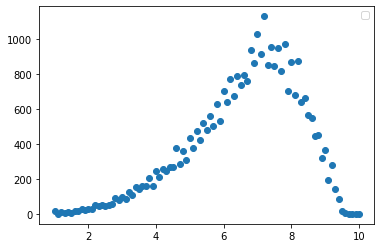

In [108]:
import matplotlib.pyplot as plt

plt.scatter(df_group_rating.index,df_group_rating.log10Votes)
plt.legend(loc="best")

/home/ulrich/venv/datascience/lib/python3.8/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

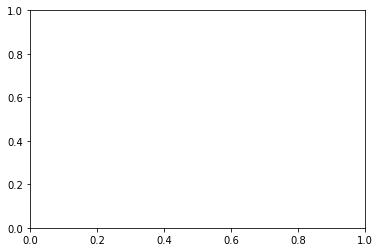

In [83]:
plt.scatter(df_group_rating["log10Votes"], df_group_rating["averageRating"])
# plt.scatter(df_group["log10Votes"], df_group["averageRating"])
plt.xlabel("Log10 Votes")
plt.ylabel("Average rating")
plt.title("Mean of the different groups")
plt.show()

### 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

<ol>
    <li>8.1 Using sklearn</li> 
    <li>8.2 Using scipy</li> 
    <li>8.3 Using pytorch</li> 
</ol>

In [69]:
# x-values for the regression will be the Average rating and y-values will be log 10 votes.
x_ = np.array(df_group_rating.index)
y_ = np.array(df_group_rating["log10Votes"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x_.reshape(-1,1)))
x = scaler.transform(x_.reshape(-1,1)).squeeze()

scaler = StandardScaler()
print(scaler.fit(y_.reshape(-1,1)))
y = scaler.transform(y_.reshape(-1,1)).squeeze()


StandardScaler()
StandardScaler()


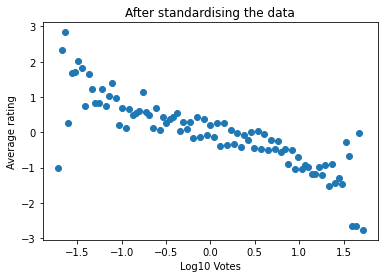

In [70]:
plt.scatter(x, y)
plt.xlabel("Log10 Votes")
plt.ylabel("Average rating")
plt.title("After standardising the data")
plt.show()

Using sklearn

In [71]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
sklearn_m ,sklearn_c = regr.coef_[0], regr.intercept_

print(f"Slope and intercept from sklearn linear regression are {sklearn_m} and {sklearn_c}.")

Slope and intercept from sklearn linear regression are -0.8494282759901052 and 3.3970653417641993e-16.


Using scipy

In [72]:
from scipy.stats import linregress
result = linregress(x, y)
scipy_m, scipy_c = result.slope, result.intercept

print(f"Slope and intercept from scipy stats linear regression are {scipy_m} and {scipy_c}.")

Slope and intercept from scipy stats linear regression are -0.8494282759901053 and 3.3970653417641993e-16.


Using pytorch

In [73]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor(x.reshape(-1,1)))
y_data = Variable(torch.Tensor(y))

In [74]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [75]:
model = LinearRegressionModel()
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)


In [76]:
# for small dataset we will just use one batch
EPOCH = 20000
for epoch in range(EPOCH):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = model(x_data)
 
    # Compute and print loss
    loss = loss_fn(pred_y, y_data)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch %1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

/home/ulrich/venv/datascience/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([91])) that is different to the input size (torch.Size([91, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 1.526415228843689
epoch 1000, loss 1.0096030235290527
epoch 2000, loss 1.0001752376556396
epoch 3000, loss 1.0000033378601074
epoch 4000, loss 1.0
epoch 5000, loss 1.0
epoch 6000, loss 1.0
epoch 7000, loss 1.0
epoch 8000, loss 1.0
epoch 9000, loss 1.0
epoch 10000, loss 1.0
epoch 11000, loss 1.0
epoch 12000, loss 1.0
epoch 13000, loss 1.0
epoch 14000, loss 1.0
epoch 15000, loss 1.0
epoch 16000, loss 1.0
epoch 17000, loss 1.0
epoch 18000, loss 1.0
epoch 19000, loss 1.0


In [77]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[1.5139e-14]], requires_grad=True)
Parameter containing:
tensor([7.4516e-09], requires_grad=True)


In [ ]:
yp = model(x_data)

In [ ]:
yp

In [ ]:
y_data

In [ ]:
linregress?